<a href="https://colab.research.google.com/github/great-simonlee/Data_Science_Portfolio.github.io/blob/master/mnisthw_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"greatsimonlee","key":"ce762d662e834c893fbc9e00799072ff"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c digit-recognizer

 92% 67.0M/73.2M [00:01<00:00, 30.8MB/s]
100% 73.2M/73.2M [00:01<00:00, 50.6MB/s]
 84% 41.0M/48.8M [00:01<00:00, 17.7MB/s]
100% 48.8M/48.8M [00:01<00:00, 25.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 211MB/s]


In [6]:
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
train_orig = pd.read_csv('train.csv')
test_orig = pd.read_csv('test.csv')

In [0]:
# Split the label column from other feature columns in the training dataset
y_train_orig = train_orig['label']
x_train_orig = train_orig.drop(labels='label', axis=1)
x_test_orig = test_orig

In [0]:
# Convert pandas data frame into numpy format
x_train = pd.DataFrame.to_numpy(x_train_orig)
y_train = pd.DataFrame.to_numpy(y_train_orig)
x_test = pd.DataFrame.to_numpy(x_test_orig)

In [0]:
# The model used here is RandomForestClassifier, which is one of the most popluar and powerful models
model = RandomForestClassifier(n_estimators=100)

In [11]:
# Model training
model.fit(x_train_orig, y_train_orig)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
train_pred = model.predict(x_train_orig)

In [0]:
test_pred = model.predict(x_test_orig)

In [14]:
confusion_matrix(train_pred, y_train_orig)

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4684,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4177,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4351,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4072,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3795,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4137,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4401,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4063,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4188]])

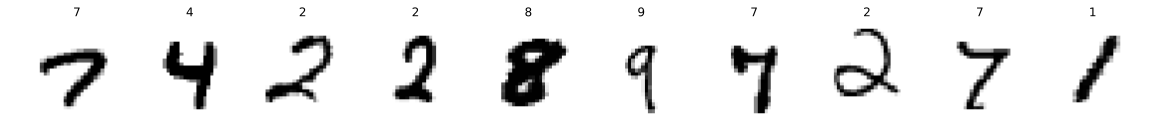

In [15]:
# Visualization of randomly chosen datapoints from the training dataset
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
index = np.random.randint(0, test_pred.shape[0], 10)
for i, j in enumerate(index):
  axes[i].imshow(x_test[j].reshape(28,28), cmap='binary')
  axes[i].set_title(test_pred[j])
  axes[i].axis('off')
plt.show()

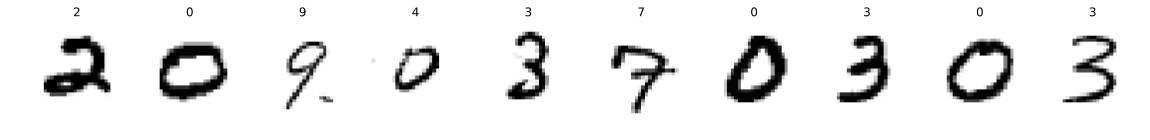

In [16]:
# Visualization of randomly chosen datapoints from the output dataset
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
  axes[i].imshow(x_test[i].reshape(28,28), cmap='binary')
  axes[i].set_title(test_pred[i])
  axes[i].axis('off')
plt.show()

In [0]:
results = test_pred

In [0]:
np.savetxt('results.csv',
          np.c_[range(1, len(x_test)+1), results],
          delimiter = ',',
          header = 'ImageId,Label',
          comments = '',
          fmt='%d')